<a href="https://colab.research.google.com/github/nhysmith/4650_HW_5/blob/main/HW_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install spacy
!pip install newsapi-python


In [ ]:
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9 MB 1.2 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [ ]:
import spacy
import en_core_web_lg
nlp_eng = spacy.load('en_core_web_lg')
from newsapi import NewsApiClient
newsapi = NewsApiClient (api_key='18d5c65bfd6e4a94a178b7e6d67f35eb')

In [72]:
articles = []
x = range(1,6)
for i in x:
  temp = newsapi.get_everything(q='coronavirus',
                                      from_param='2021-09-22',
                                      to='2021-10-22',
                                      language='en',
                                      sort_by='relevancy',
                                      page=i)
  #print(temp)
  articles.append(temp)

In [73]:
import pickle
filename = 'articlesCOVID.pckl'
pickle.dump(articles, open(filename, 'wb'))

filename = 'articlesCOVID.pckl'
loaded_model = pickle.load(open(filename, 'rb'))

filepath = '/content/articlesCOVID.pckl'
pickle.dump(loaded_model, open(filepath, 'wb'))

In [74]:
import pandas as pd
dados = []
for i, article in enumerate(articles):
    for x in article['articles']:
        title = x['title']
        date = x['publishedAt']
        description = x['description']
        content = x['content']
        dados.append({'title':title, 'date':date, 'desc':description, 'content':content})
df = pd.DataFrame(dados)
df = df.dropna()
df.head()

,title,date,desc,content
0,New York City Mandates Vaccines for Its Worker...,2021-10-20T20:50:14Z,"Mayor Bill de Blasio says 46,000 unvaccinated ...","Gregory Floyd, president of Teamsters Local 23..."
1,Most U.S. Health Workers Comply With Vaccine M...,2021-09-29T09:24:17Z,Although some have quit their jobs rather than...,Hundreds of sought-after nurses are leaving so...
2,Experts Call for U.S. Vaccination Push as Cold...,2021-10-08T10:02:38Z,Experts say that steady inoculation rates are ...,"LiveUpdated Oct. 8, 2021, 5:56 a.m. ET\r\nOct...."
3,New York Hospitals Face Possible Mass Firings ...,2021-09-24T21:01:26Z,"With a Monday deadline looming, thousands of h...",New York States vaccination requirement for he...
4,The State of the Pandemic,2021-10-07T10:00:07Z,What can the U.S. expect from the coronavirus ...,Apoorva Mandavilli contributed reporting.\r\nT...


In [75]:
import string
pos_tag = {'VERB', 'NOUN', 'PROPN'}

def get_keywords_eng(text):
  result = []
  for token in nlp_eng(text):
    if (token.text in nlp_eng.Defaults.stop_words or token.text in string.punctuation):
      continue
    if (token.pos_ in pos_tag):
      result.append(token.text)

  return result


In [76]:
from collections import Counter
results = []
for content in df.content.values:
    results.append([('#' + x[0]) for x in Counter(get_keywords_eng(content)).most_common(5)])
df['keywords'] = results

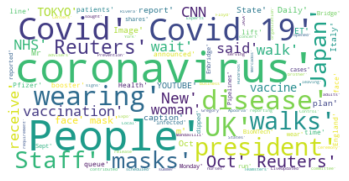

In [77]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = str(results)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [78]:
f = open("dataset.txt", "w")
for i in results:
  f.write(str(i))
  f.write('\n')
f.close()